# **Parte 3 - Marcas de Autos**

Primero, importamos las bibliotecas necesarias, cargamos los datos y los visualizamos utilizando `datos.head()`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from google.colab import widgets
import warnings

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.utils import resample

warnings.filterwarnings("ignore")

In [4]:
datos = pd.read_csv('/content/drive/MyDrive/Universidad/AAD/Parcial1/LondonCars2014.csv')

In [5]:
datos.head()

,Make,Model,Year,Mileage,Price,Body Style,Ex Color,In Color,Engine,Transmission,Doors
0,Toyota,Avalon XLE,2014,4725,28995,Sedan,Gray,Black,6 Cyl,Automatic,4
1,Ford,Escape SE,2014,17201,24994,SUV,Silver,Black,4 Cyl,Automatic,4
2,Hyundai,Santa Fe Sport,2014,6279,25998,SUV,Silver,Gray,4 Cyl,Automatic,4
3,Ford,Escape SE,2014,16262,26684,SUV,Black,Black,4 Cyl,Automatic,4
4,Jeep,Grand Cherokee Limited Edition,2014,35572,33440,SUV,Black,Black,6 Cyl,Automatic,4


## **A. Selección de la Marca**

Contamos cuántas veces aparece cada modelo de automóvil en el conjunto de datos y luego imprimimos estos conteos junto con el nombre del modelo para realizar una selección de la marca.

In [6]:
modelo_counts = datos['Model'].value_counts().reset_index()
modelo_counts.columns = ['Model', 'Count']
print(modelo_counts)

              Model  Count
0          Altima S    197
1             C 300    175
2     3 Series 328i    141
3            RX 350    139
4              G 37    132
...             ...    ...
1055         S40 T5      1
1056    Seville SLS      1
1057           62 S      1
1058     300 C SRT8      1
1059     Spectra SX      1

[1060 rows x 2 columns]


Seleccionamos el modelo de automóvil "Altima S" de entre las diversas opciones disponibles en el conjunto de datos, con el objetivo de centrar nuestro análisis en esta marca y modelo específico.

Seleccionamos este modelo de automóvil siguiendo este enfoque por dos razones fundamentales:

1. **Representatividad de datos:** La elección de un modelo de automóvil con la mayor cantidad de registros nos permite trabajar con una cantidad de datos sustancial, lo que, en última instancia, fortalece la validez y la representatividad de nuestros análisis.

2. **Amplia disponibilidad de información:** La abundancia de datos disponibles para un modelo en particular nos otorga la capacidad de llevar a cabo análisis más exhaustivos y detallados. Esto nos facilita la identificación de patrones, tendencias y particularidades específicas relacionadas con ese modelo en particular, lo que enriquece significativamente nuestro análisis.

In [7]:
filtro = datos['Model'] == 'Altima S'
datos = datos[filtro]
datos = datos.reset_index(drop=True)
datos.head()

,Make,Model,Year,Mileage,Price,Body Style,Ex Color,In Color,Engine,Transmission,Doors
0,Nissan,Altima S,2013,29483,17768,Coupe,Blue,Tan,4 Cyl,Automatic,2
1,Nissan,Altima S,2013,5457,17777,Sedan,Black,Gray,6 Cyl,Automatic,4
2,Nissan,Altima S,2012,33047,13995,Sedan,Gray,Gray,4 Cyl,Automatic,4
3,Nissan,Altima S,2012,33616,16977,Sedan,Black,Gray,4 Cyl,Automatic,4
4,Nissan,Altima S,2012,7301,15996,Sedan,Blue,Black,4 Cyl,Automatic,4


Graficamos la relación entre tres variables fundamentales: "Mileage" (kilometraje), "Year" (año de fabricación) y "Price" (precio de venta) de los vehículos en nuestro conjunto de datos. La importancia de esta visualización radica en su capacidad para brindarnos una comprensión efectiva de cómo estas tres variables se interrelacionan. Los puntos en el gráfico no solo reflejan la distribución de los datos, sino que también proporcionan información adicional a través del tamaño y el color. El tamaño de los puntos se ajusta según el precio de los vehículos, lo que nos permite identificar patrones de precios en función del kilometraje y el año de fabricación. Además, el color de los puntos se utiliza para representar el valor del precio, lo que añade otra dimensión a nuestra interpretación de los datos. Esta representación visual nos permite identificar patrones y tendencias de manera rápida y efectiva.

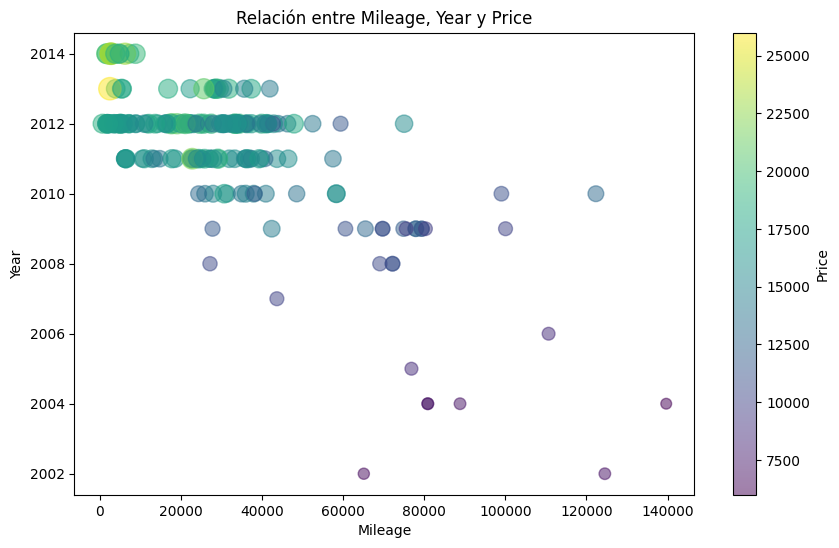

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(datos['Mileage'], datos['Year'], c=datos['Price'], cmap='viridis', s=datos['Price']/100, alpha=0.5)
plt.xlabel('Mileage')
plt.ylabel('Year')
plt.title('Relación entre Mileage, Year y Price')
cbar = plt.colorbar()
cbar.set_label('Price')
plt.show()

En este gráfico tridimensional, exploramos la relación entre tres variables clave: "Mileage" (kilometraje), "Year" (año de fabricación) y "Price" (precio de venta) de los vehículos en nuestro conjunto de datos. La importancia de esta representación gráfica radica en su capacidad para proporcionar una comprensión efectiva de cómo estas tres variables interactúan entre sí en un espacio tridimensional. En lugar de puntos bidimensionales, ahora tenemos puntos tridimensionales que no solo nos permiten visualizar la distribución de los datos, sino que también agregan una dimensión adicional a través del tamaño y el color de los puntos. El tamaño de los puntos se escala según el precio de los vehículos, lo que facilita la identificación de patrones de precios en función del kilometraje y el año de fabricación. Asimismo, el color de los puntos representa el valor del precio, lo que añade otra dimensión a nuestra interpretación de los datos. Esta representación visual tridimensional nos permite identificar patrones y tendencias de manera rápida y efectiva en un espacio de datos más complejo.

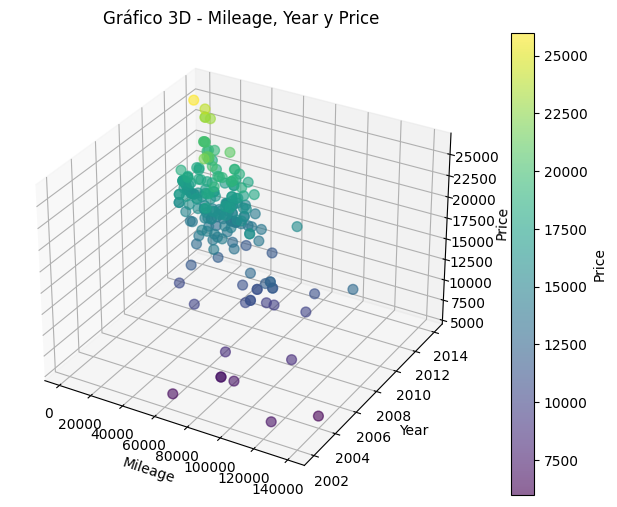

In [9]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

x = datos['Mileage']
y = datos['Year']
z = datos['Price']

scatter = ax.scatter(x, y, z, c=z, cmap='viridis', s=50, alpha=0.6)

ax.set_xlabel('Mileage')
ax.set_ylabel('Year')
ax.set_zlabel('Price')

cbar = plt.colorbar(scatter)
cbar.set_label('Price')

plt.title('Gráfico 3D - Mileage, Year y Price')
plt.show()

A partir de las representaciones gráficas previas, podemos extraer valiosas conclusiones. Observamos que los precios por encima de los 15000 están asociados principalmente a vehículos fabricados a partir del año 2009, mientras que los precios por debajo de 1500 se concentran en vehículos fabricados entre 2002 y 2009. Además, notamos que la mayoría de los vehículos en nuestro conjunto de datos tienen un kilometraje inferior a 80000 millas, y que, a partir del año 2009, una parte significativa de los vehículos también presenta un kilometraje por debajo de este umbral. Estas observaciones nos proporcionan información valiosa sobre cómo los años de fabricación y el kilometraje influyen en los precios de venta de los vehículos en nuestro análisis.

## **B, C. Selección de Modelo y Validación del Modelo**

Primero, antes de continuar con el análisis, procedemos a eliminar las variables categóricas del conjunto de datos.

In [10]:
datos = datos.drop(columns=['Make', 'Model', "Body Style", "Ex Color", "In Color", "Engine", "Transmission", "Doors"])
datos.head()

,Year,Mileage,Price
0,2013,29483,17768
1,2013,5457,17777
2,2012,33047,13995
3,2012,33616,16977
4,2012,7301,15996


Se divide entre las variables predictorias y la variable objetivo

In [77]:
y = datos.Price
X = datos.drop(columns=["Price"])

Se divide en entrenamiento y test

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state = 0)

Luego, procedimos a evaluar si un modelo de regresión polinomial o un modelo de regresión lineal se ajustaría mejor a nuestros datos. Además, para garantizar la robustez y la capacidad de generalización de nuestro modelo, implementamos técnicas de validación, como la validación cruzada. Esto nos permitió evaluar el rendimiento del modelo en diferentes conjuntos de datos, asegurándonos de que las conclusiones obtenidas sean aplicables de manera más amplia a nuevos datos y no se vean limitadas por características específicas de nuestro conjunto de datos original.

In [38]:
orders = range(1, 6)
k=7

RMSE_Train = dict.fromkeys(orders)
RMSE_Test = dict.fromkeys(orders)

tb = widgets.TabBar([str(order) for order in orders])

for order in orders:
    with tb.output_to(str(order), select=(order < 2)):

        print("\n --------------------- \n\n\tPolinomio de orden", order)

        rmse_train_sum = 0
        rmse_test_sum = 0

        kf = KFold(n_splits=k,shuffle=True, random_state=0)

        for train_idx, test_idx in kf.split(X_train):

          X_train_ind = X_train.iloc[train_idx]
          y_train_ind = y_train.iloc[train_idx]
          X_test_ind = X_train.iloc[test_idx]
          y_test_ind = y_train.iloc[test_idx]

          poly = PolynomialFeatures(degree=order)
          X_train_poly = poly.fit_transform(X_train_ind)
          X_test_poly = poly.fit_transform(X_test_ind)

          model = LinearRegression()
          model.fit(X_train_poly, y_train_ind)
          y_train_pred = model.predict(X_train_poly)
          y_test_pred = model.predict(X_test_poly)

          rmse_train_sum += mean_squared_error(y_train_ind, y_train_pred)**0.5
          rmse_test_sum += mean_squared_error(y_test_ind, y_test_pred)**0.5

        print("RMSE_Train_AVG =", rmse_train_sum / kf.n_splits)
        print("RMSE_Test_AVG =", rmse_test_sum / kf.n_splits, "\n")

        RMSE_Train[order] = rmse_train_sum / kf.n_splits
        RMSE_Test[order] = rmse_test_sum / kf.n_splits

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden 1
RMSE_Train_AVG = 1731.6881885880232
RMSE_Test_AVG = 1728.8202711042775 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden 2
RMSE_Train_AVG = 1681.4923093148986
RMSE_Test_AVG = 1772.6160670953743 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden 3
RMSE_Train_AVG = 1664.2523831857977
RMSE_Test_AVG = 1709.7422446590588 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden 4
RMSE_Train_AVG = 1660.494935087821
RMSE_Test_AVG = 1830.2706976869854 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden 5
RMSE_Train_AVG = 1659.6157442937988
RMSE_Test_AVG = 1813.1482071013659 



<IPython.core.display.Javascript object>

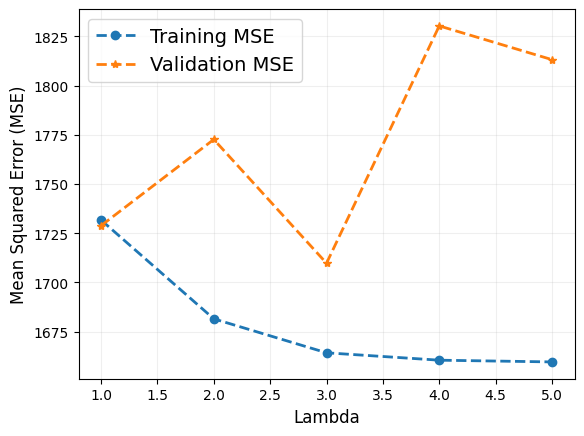

In [39]:
plt.plot(orders, list(RMSE_Train.values()), '--o', label='Training MSE', linewidth=2)
plt.plot(orders, list(RMSE_Test.values()), '--*', label='Validation MSE', linewidth=2)

plt.xlabel("Lambda", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.grid(alpha=0.2)
plt.legend(fontsize=14)
plt.show()

In [40]:
print("Valor mínimo RMSE para Linear: ", RMSE_Test[min(RMSE_Test, key=lambda k: RMSE_Test[k])], "\t Grado que lo obtuvo: ", min(RMSE_Test, key=lambda k: RMSE_Test[k]))

Valor mínimo RMSE para Linear:  1709.7422446590588 	 Grado que lo obtuvo:  3


Observamos que el mejor modelo es el de grado 3. Así se comparará si Ridge o Lasso pueden obtener mejores valores

In [49]:
order = 3
k=7
myLambdas = [10**-10, 10**-9, 10**-8, 10**-7, 10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 1.5]

RMSE_Train = dict.fromkeys(myLambdas)
RMSE_Test = dict.fromkeys(myLambdas)

tbReg = widgets.TabBar([str(myLambda) for myLambda in myLambdas])

for myLambda in myLambdas:
  with tbReg.output_to(str(myLambda), select= (myLambda < 2)):

        print("\n --------------------- \n\n\tPolinomio de orden ", order, "\t Lambda utilizado ", myLambda)

        rmse_train_sum = 0
        rmae_train_sum = 0

        kf = KFold(n_splits=k,shuffle=True, random_state=0)

        for train_idx, test_idx in kf.split(X_train):

          X_train_ind = X_train.iloc[train_idx]
          y_train_ind = y_train.iloc[train_idx]
          X_test_ind = X_train.iloc[test_idx]
          y_test_ind = y_train.iloc[test_idx]

          poly = PolynomialFeatures(degree=order)
          X_train_poly = poly.fit_transform(X_train_ind)
          X_test_poly = poly.fit_transform(X_test_ind)

          model = Ridge(alpha = myLambda)
          model.fit(X_train_poly, y_train_ind)
          y_train_pred = model.predict(X_train_poly)
          y_test_pred = model.predict(X_test_poly)

          rmse_train_sum += mean_squared_error(y_train_ind, y_train_pred)**0.5
          rmse_test_sum += mean_squared_error(y_test_ind, y_test_pred)**0.5

        print("RMSE_Train_AVG =", rmse_train_sum / kf.n_splits)
        print("RMSE_Test_AVG =", rmse_test_sum / kf.n_splits, "\n")

        RMSE_Train[myLambda] = rmse_train_sum / kf.n_splits
        RMSE_Test[myLambda] = rmse_test_sum / kf.n_splits

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  3 	 Lambda utilizado  1e-10
RMSE_Train_AVG = 1662.2262149954327
RMSE_Test_AVG = 47392.45910667627 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  3 	 Lambda utilizado  1e-09
RMSE_Train_AVG = 1662.5824326884976
RMSE_Test_AVG = 49102.31264663556 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  3 	 Lambda utilizado  1e-08
RMSE_Train_AVG = 1662.633060859323
RMSE_Test_AVG = 50811.37266690373 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  3 	 Lambda utilizado  1e-07
RMSE_Train_AVG = 1662.6384329024895
RMSE_Test_AVG = 52520.36890913995 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  3 	 Lambda utilizado  1e-06
RMSE_Train_AVG = 1662.6389703533212
RMSE_Test_AVG = 54229.35986124897 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  3 	 Lambda utilizado  1e-05
RMSE_Train_AVG = 1662.6390259676539
RMSE_Test_AVG = 55938.362930730465 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  3 	 Lambda utilizado  0.0001
RMSE_Train_AVG = 1662.639043846477
RMSE_Test_AVG = 57647.365925964645 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  3 	 Lambda utilizado  0.001
RMSE_Train_AVG = 1662.640117619281
RMSE_Test_AVG = 59356.45715464559 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  3 	 Lambda utilizado  0.01
RMSE_Train_AVG = 1662.7083563402448
RMSE_Test_AVG = 61066.06672229427 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  3 	 Lambda utilizado  0.1
RMSE_Train_AVG = 1663.479723266437
RMSE_Test_AVG = 62776.00491357881 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  3 	 Lambda utilizado  1
RMSE_Train_AVG = 1664.134734119986
RMSE_Test_AVG = 64485.76947137947 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  3 	 Lambda utilizado  1.5
RMSE_Train_AVG = 1664.1724769260643
RMSE_Test_AVG = 66195.5164093372 



<IPython.core.display.Javascript object>

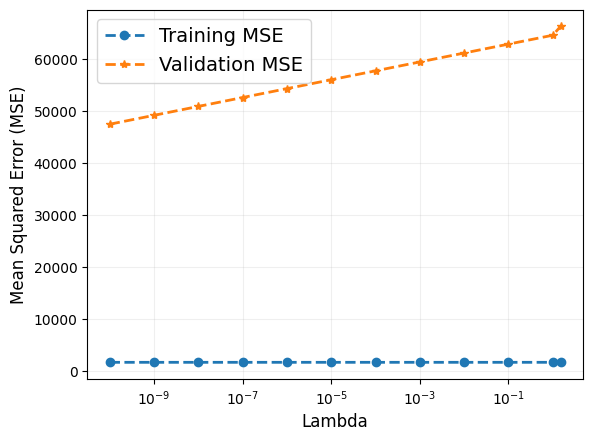

In [50]:
plt.plot(myLambdas, list(RMSE_Train.values()), '--o', label='Training MSE', linewidth=2)
plt.plot(myLambdas, list(RMSE_Test.values()), '--*', label='Validation MSE', linewidth=2)

plt.xlabel("Lambda", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.grid(alpha=0.2)
plt.legend(fontsize=14)
plt.xscale('log')
plt.show()

In [51]:
print("Valor mínimo RMSE para Ridge: ", RMSE_Test[min(RMSE_Test, key=lambda k: RMSE_Test[k])], "\t Lambda que lo obtuvo: ", min(RMSE_Test, key=lambda k: RMSE_Test[k]))

Valor mínimo RMSE para Ridge:  47392.45910667627 	 Lambda que lo obtuvo:  1e-10


Recordemos que:

Valor mínimo RMSE para Linear:  1709.7422446590588 	 Grado que lo obtuvo:  3

Así, Ridge es peor.

In [68]:
order = 3
k=7
myLambdas = [10**-12, 10**-11, 10**-10, 10**-9, 10**-8, 10**-7, 10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 1.5]

RMSE_Train = dict.fromkeys(myLambdas)
RMSE_Test = dict.fromkeys(myLambdas)

tbReg = widgets.TabBar([str(myLambda) for myLambda in myLambdas])

for myLambda in myLambdas:
  with tbReg.output_to(str(myLambda), select= (myLambda < 2)):

        print("\n --------------------- \n\n\tPolinomio de orden ", order, "\t Lambda utilizado ", myLambda)

        rmse_train_sum = 0
        rmae_train_sum = 0

        kf = KFold(n_splits=k,shuffle=True, random_state=0)

        for train_idx, test_idx in kf.split(X_train):

          X_train_ind = X_train.iloc[train_idx]
          y_train_ind = y_train.iloc[train_idx]
          X_test_ind = X_train.iloc[test_idx]
          y_test_ind = y_train.iloc[test_idx]

          poly = PolynomialFeatures(degree=order)
          X_train_poly = poly.fit_transform(X_train_ind)
          X_test_poly = poly.fit_transform(X_test_ind)

          model = Lasso(alpha = myLambda)
          model.fit(X_train_poly, y_train_ind)
          y_train_pred = model.predict(X_train_poly)
          y_test_pred = model.predict(X_test_poly)

          rmse_train_sum += mean_squared_error(y_train_ind, y_train_pred)**0.5
          rmse_test_sum += mean_squared_error(y_test_ind, y_test_pred)**0.5

        print("RMSE_Train_AVG =", rmse_train_sum / kf.n_splits)
        print("RMSE_Test_AVG =", rmse_test_sum / kf.n_splits, "\n")

        RMSE_Train[myLambda] = rmse_train_sum / kf.n_splits
        RMSE_Test[myLambda] = rmse_test_sum / kf.n_splits

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  3 	 Lambda utilizado  1e-12
RMSE_Train_AVG = 1711.8912373989972
RMSE_Test_AVG = 112936.86468150334 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  3 	 Lambda utilizado  1e-11
RMSE_Train_AVG = 1711.8912373990006
RMSE_Test_AVG = 114668.03917691729 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  3 	 Lambda utilizado  1e-10
RMSE_Train_AVG = 1711.8912373989988
RMSE_Test_AVG = 116399.21367233121 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  3 	 Lambda utilizado  1e-09
RMSE_Train_AVG = 1711.8912373989676
RMSE_Test_AVG = 118130.38816774511 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  3 	 Lambda utilizado  1e-08
RMSE_Train_AVG = 1711.891237398641
RMSE_Test_AVG = 119861.56266315839 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  3 	 Lambda utilizado  1e-07
RMSE_Train_AVG = 1711.8912373954004
RMSE_Test_AVG = 121592.73715856536 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  3 	 Lambda utilizado  1e-06
RMSE_Train_AVG = 1711.8912373631106
RMSE_Test_AVG = 123323.91165390963 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  3 	 Lambda utilizado  1e-05
RMSE_Train_AVG = 1711.8912370400956
RMSE_Test_AVG = 125055.086148627 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  3 	 Lambda utilizado  0.0001
RMSE_Train_AVG = 1711.8912338097812
RMSE_Test_AVG = 126786.26063707529 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  3 	 Lambda utilizado  0.001
RMSE_Train_AVG = 1711.8912015067378
RMSE_Test_AVG = 128517.43506283204 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  3 	 Lambda utilizado  0.01
RMSE_Train_AVG = 1711.8908784794894
RMSE_Test_AVG = 130248.60886168371 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  3 	 Lambda utilizado  0.1
RMSE_Train_AVG = 1711.887648520132
RMSE_Test_AVG = 131979.77639245684 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  3 	 Lambda utilizado  1
RMSE_Train_AVG = 1711.855379689312
RMSE_Test_AVG = 133710.8813312669 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  3 	 Lambda utilizado  1.5
RMSE_Train_AVG = 1711.8374762315245
RMSE_Test_AVG = 135441.95156987946 



<IPython.core.display.Javascript object>

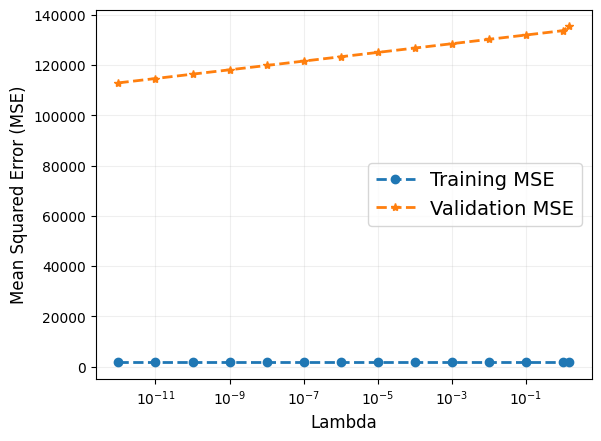

In [69]:
plt.plot(myLambdas, list(RMSE_Train.values()), '--o', label='Training MSE', linewidth=2)
plt.plot(myLambdas, list(RMSE_Test.values()), '--*', label='Validation MSE', linewidth=2)

plt.xlabel("Lambda", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.grid(alpha=0.2)
plt.legend(fontsize=14)
plt.xscale('log')
plt.show()

In [67]:
print("Valor mínimo RMSE para Lasso: ", RMSE_Test[min(RMSE_Test, key=lambda k: RMSE_Test[k])], "\t Lambda que lo obtuvo: ", min(RMSE_Test, key=lambda k: RMSE_Test[k]))

Valor mínimo RMSE para Lasso:  88700.60329771329 	 Lambda que lo obtuvo:  1e-12


Recordemos que:

Valor mínimo RMSE para Linear:  1709.7422446590588 	 Grado que lo obtuvo:  3

Así, Lasso es peor.

Tras realizar una exhaustiva evaluación de varios modelos de regresión, observamos que el valor mínimo del Error Cuadrático Medio de la Raíz (RMSE) se obtuvo para el modelo de regresión lineal de grádo 3, con un RMSE_Test de 1709.

## **C. Validación del Modelo**

Así, se hace la comparativa del modelo respecto a todo el train y todo el test:

In [74]:
order = 3
model = LinearRegression()

poly = PolynomialFeatures(degree=order)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [75]:
model.fit(X_train_poly, y_train)
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

In [72]:
mrse_train = mean_squared_error(y_train, y_train_pred)**0.5
mrse_test = mean_squared_error(y_test, y_test_pred)**0.5

In [73]:
print("MRSE_Train_Linear: ", mrse_train, "\t MRSE_Test_Linear: ", mrse_test)

MRSE_Train_Linear:  1670.5664167839948 	 MRSE_Test_Linear:  1676.9750088649073


## **D. Mejor Modelo**

In [78]:
order = 3
model = LinearRegression()

poly = PolynomialFeatures(degree=order)
X_poly = poly.fit_transform(X)

In [79]:
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

In [81]:
mrse = mean_squared_error(y_pred, y)**0.5

In [82]:
print("MRSE_Mejor: ", mrse)

MRSE_Mejor:  1649.1267551515332
